# ADA Final exam 2017
Louis Baligand 235689
louis.baligand@epfl.ch

## Question 1: Exploring the data

1)(6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

For this brief overview, we will first start by importing the files and describe the available data (is there any missing values etc...).

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [2]:
# Import the pokemon statistics
df_pokemon = pd.read_csv('pokemon.csv')
df_pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [3]:
# Import the pokemon combat results
df_combats = pd.read_csv('combats.csv')
df_combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [4]:
# Decscribe the data
df_pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [5]:
# Decscribe the data
df_combats.describe()

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


In [17]:
df_pokemon.isnull().sum()

pid            0
Name           1
Class 1        0
Class 2      386
HP             0
Attack         0
Defense        0
Sp. Atk        0
Sp. Def        0
Speed          0
Legendary      0
dtype: int64

In [6]:
# check if there is nan values
df_pokemon.drop('Class 2', axis=1).isnull().sum()

pid          0
Name         1
Class 1      0
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
Legendary    0
dtype: int64

In [7]:
# check missing name
df_1class = df_pokemon.drop('Class 2', axis=1)
print(df_1class[df_1class['Name'].isnull()])

# Quick manual fix
df_pokemon.loc[62, 'Name'] = 'Primeape'
df_pokemon.iloc[60:65]

    pid Name   Class 1  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed Legendary
62   63  NaN  Fighting  65     105       60       60       70     95     False


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
60,61,Golduck,Water,NaN,80,82,78,95,80,85,False
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,False
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,False
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95,False


In [8]:
# check if there is nan values in combats
df_combats.isnull().values.any()

False

As expected, every pokemon do not have 2 classes. Except this, there is no missing values (Except one Name for one pokemon).

In [9]:
# Number of classes
print('There are ', df_pokemon['Class 1'].nunique(), 'different classes:')
df_pokemon['Class 1'].unique()

There are  18 different classes:


array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

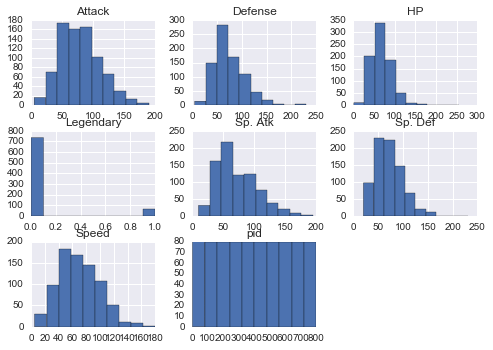

In [10]:
# plot stat distributions
df_pokemon.hist();

This brief analysis gives few insights regarding the overall stats of the pokemons.  
  

2)(4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,  
visualize the relation between these two variables using an appropriate plot;  
list the names of the 3 Pokémon with highest attack-over-defense ratio;
list the names of the 3 Pokémon with lowest attack-over-defense ratio;
list the names of the 10 Pokémon with the largest number of victories.

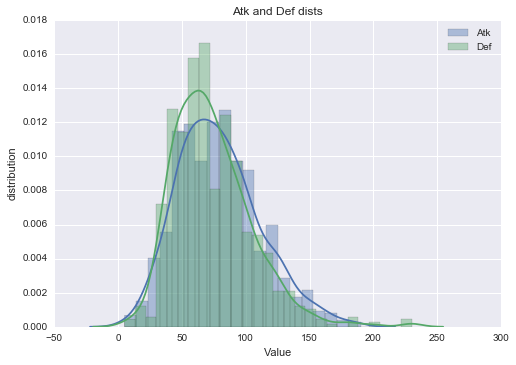

In [29]:
fig, ax = plt.subplots()
sns.distplot(df_pokemon['Attack'], ax=ax, label="Atk")
sns.distplot(df_pokemon['Defense'], ax=ax, label="Def")
plt.title('Atk and Def dists')
plt.xlabel('Value')
plt.ylabel('distribution')
plt.legend()
plt.show()

In [55]:
# List the top 3 attack/def pokemon
atk_def = df_pokemon['Attack']/df_pokemon['Defense']
df_pokemon.loc[atk_def.sort_values(ascending=False).index[:3]]['Name']

429    DeoxysAttack Forme
347              Carvanha
19          Mega Beedrill
Name: Name, dtype: object

In [56]:
# List the top 3 lowest attack/def pokemon
df_pokemon.loc[atk_def.sort_values().index[:3]]['Name']

230     Shuckle
139    Magikarp
484     Bronzor
Name: Name, dtype: object

In [64]:
df_pokemon.iloc[df_combats['Winner'].value_counts()[:10].index+1]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True
155,156,Snorlax,Normal,NaN,160,110,65,65,110,30,False
439,440,Prinplup,Water,NaN,64,66,68,81,76,50,False
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True
433,434,Grotle,Grass,NaN,75,89,85,55,65,36,False
315,316,Ninjask,Bug,Flying,61,90,45,50,50,160,False
215,216,Misdreavus,Ghost,NaN,60,60,60,85,85,85,False
395,396,Snorunt,Ice,NaN,50,50,50,50,50,50,False
250,251,Phanpy,Ground,NaN,90,60,60,40,40,40,False
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True


3)(10 points) Professor Oak suspects that Pokémon in the grass class have a stronger regular attack than those in the rock class. Check if he is right and convince him of your conclusion with statistical arguments. Note: If there are Pokémon that are in both classes, discard them. Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

In order to know whether the grass class has higher Attack than the rock class, we can compare the two ditributions of attack using boxplots.

In [79]:
# Fetch the grass and rock pokemon
df_grass = df_pokemon[df_pokemon['Class 1'] == 'Grass']
df_grass = df_grass.append(df_pokemon[df_pokemon['Class 2'] == 'Grass'])
df_grass = df_grass[df_grass['Class 1'] != 'Rock']
df_grass = df_grass[df_grass['Class 2'] != 'Rock']
df_grass = df_grass[['pid', 'Name', 'Attack']]
df_grass['Class'] = 'Grass' 

df_rock = df_pokemon[df_pokemon['Class 1'] == 'Rock']
df_rock = df_rock.append(df_pokemon[df_pokemon['Class 2'] == 'Rock'])
df_rock = df_rock[df_rock['Class 1'] != 'Grass']
df_rock = df_rock[df_rock['Class 2'] != 'Grass']
df_rock = df_rock[['pid', 'Name', 'Attack']]
df_rock['Class'] = 'Rock'
df_rock.head()

,pid,Name,Attack,Class
80,81,Geodude,80,Rock
81,82,Graveler,95,Rock
82,83,Golem,120,Rock
103,104,Onix,45,Rock
149,150,Omanyte,40,Rock


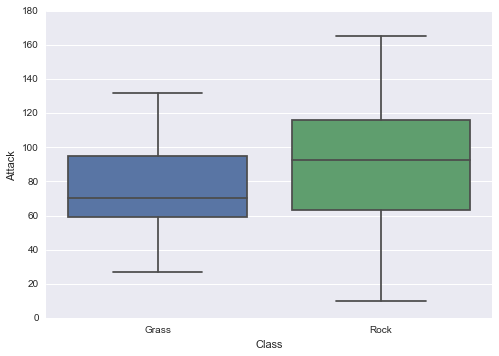

In [81]:
# Merge the two dataframes
df_class = df_grass.append(df_rock)

# Plot the boxplots
sns.boxplot(x='Class', y='Attack', data=df_class)

According to the boxplot shown below, Professor Oak is wrong. Indeed the median is clearly higher for the rock pokemon and so are the quartile. However, rock pokemon are much more in the extreme.

4)(10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories. Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called pokemon and combats, with the same schema as the small CSV files you’ve been working with above.

In [85]:
df_combats['Wins'].map(lambda x: (x, 1)).groupBy(lambda x,y : x+y).sort()

ImportError: No module named 'pyspark'

## Question 2: Prediction

1) (3 points) Generate the feature vectors and the labels to train your model.
  
The feature vectors are the stats of all the pokemon. Hence when we input the two pokemon id, we need to translate it to their stats. The labels is 0 if the first pokemon won or 1 if the second won (binary classification)


In [99]:
# indexes start at 0 whereas id at 1
df_pokemon = df_pokemon.set_index('pid')

In [100]:
# fetch the stats of the first and second pokemon
X_1 = df_pokemon.loc[df_combats['First_pokemon'].values]
X_2 = df_pokemon.loc[df_combats['Second_pokemon'].values]

In [120]:
# Merge the two stats
X = pd.concat([X_1.reset_index().add_suffix('_first'), X_2.reset_index().add_suffix('_second')], axis=1)
X.head()

,pid_first,Name_first,Class 1_first,Class 2_first,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,...,Name_second,Class 1_second,Class 2_second,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second,Legendary_second
0,266,Larvitar,Rock,Ground,50,64,50,45,50,41,...,Nuzleaf,Grass,Dark,70,70,40,60,40,60,False
1,702,Virizion,Grass,Fighting,91,90,72,90,129,108,...,Terrakion,Rock,Fighting,91,129,90,72,90,108,True
2,191,Togetic,Fairy,Flying,55,40,85,80,105,40,...,Beheeyem,Psychic,NaN,75,75,75,125,95,40,False
3,237,Slugma,Fire,NaN,40,40,40,70,40,20,...,Druddigon,Dragon,NaN,77,120,90,60,90,48,False
4,151,Omastar,Rock,Water,70,60,125,115,70,55,...,Shuckle,Bug,Rock,20,10,230,10,230,5,False


In [131]:
# Create labels
labels = []
for idx, id_winner in enumerate(df_combats['Winner']):
    if id_winner == df_combats.iloc[idx, 0]:
        labels.append(0)
    else:
        labels.append(1)
Y = pd.Series(labels)
Y.head()

0    1
1    1
2    1
3    1
4    0
dtype: int64

2) (5 points) How does your model handle categorical features and Pokémon with multiple classes?  
  
We set categorical features to the type category, the class. We transform it using one hot encoding. We can get rid ot the Name since the pid is equivalent. For pokemon that have only one class, we keep the nan value in order to keep the information that the pokemon has only one class.

In [121]:
# Transform categorical features
cat_col = ['Class 1_first', 'Class 2_first', 'Class 1_second', 'Class 2_second']
for col in cat_col:
    X[col] = X[col].astype('category')
    
# Transform to numerical values
X = pd.get_dummies( columns = cat_col, data=X)

# Drop names
X = X.drop('Name_first', axis=1)
X = X.drop('Name_second', axis=1)

X.head()

,pid_first,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Legendary_first,pid_second,HP_second,...,Class 2_second_Ghost,Class 2_second_Grass,Class 2_second_Ground,Class 2_second_Ice,Class 2_second_Normal,Class 2_second_Poison,Class 2_second_Psychic,Class 2_second_Rock,Class 2_second_Steel,Class 2_second_Water
0,266,50,64,50,45,50,41,False,298,70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,702,91,90,72,90,129,108,True,701,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,191,55,40,85,80,105,40,False,668,75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,237,40,40,40,70,40,20,False,683,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,151,70,60,125,115,70,55,False,231,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


3) (10 points) Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (n_estimators, try values 10, 25, 50, 100) and the maximum tree depth (max_depth, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.  
  
We first focus on the splitting

In [132]:
# Split the data
# This are the indices that we shufle
from random import shuffle

num_obs = X.shape[0]
indices = list(range(0, num_obs) )
shuffle(indices)
# The first 10% indices represent the validation set, the next 10% th etest set and the rest the training set 
indices_test = indices[:int(num_obs/10)]
indices_train = indices[int(num_obs/10):] 
print("Test size:",len(indices_test))
print("Train size:",len(indices_train))

# We split the dataset, with the indices
x_train =  X.loc[indices_train]
y_train = Y.loc[indices_train]

x_test = X.loc[indices_test]
y_test = Y.loc[indices_test]

Test size: 5000
Train size: 45000


In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
n_estimatorss = [10, 25, 50, 100]
max_depths = [2, 4, 10]

results = np.zeros((len(n_estimatorss), len(max_depths)))
for i, n_estimator in enumerate(n_estimatorss):
    for j, depth in enumerate(max_depths):
        # Fit the random fost to the training data
        clf = RandomForestClassifier(max_depth=depth, n_estimators=n_estimator)
        clf.fit(x_train, y_train)

        # Test the model
        preds = clf.predict(x_test)

        # Compute accuracy of our model
        results[i, j] = accuracy_score(y_test, preds)

4) (5 points) Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?

In [139]:
results

array([[0.7304, 0.8272, 0.8642],
       [0.7318, 0.8156, 0.8916],
       [0.7678, 0.7992, 0.8944],
       [0.7482, 0.8046, 0.8992]])

According to our results, the best hyperparameters are with n_estimators 100 and max_depth 10. As a binary classification we obtain between 0.73 and 0.90 accuracy which is relatevly good. Note that we chose accuracy for the sake of simplicity but it might not be best suited if the labels are evenly distributed (equal number of first win and second win). It makes however sense to choose it since there is no information whether the pokemon is the first or the second.

5) (5 points) Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).

As previously stated, we shuffled the data before splitting it. However, even if it adds randoness, it might be the case that our splitting is by luck (or not) a good sample to train and to test our model. A good way to overcome this situation is to do cross validation.

6) (7 points) Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.

In [141]:
from sklearn.model_selection import cross_val_score

# compute the cross validation scores
clf = RandomForestClassifier(max_depth=100, n_estimators=10)
scores = cross_val_score(clf, X, Y, cv=5)
scores

array([0.91340866, 0.9195    , 0.9157    , 0.9232    , 0.92419242])

By doing a 5 fold cross validation, we obtained, 5 scores that are higher than 0.9. This supports our model and our parameter selection. 

7) (5 points) Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

In [145]:
# With the best model, find the mos important features
clf.fit(X, Y)
features = clf.feature_importances_
f_names = X.columns
df_feat = pd.DataFrame([features, f_names])

In [159]:
df_feat.columns = df_feat.iloc[1, :]
df_feat.drop(1)

1,pid_first,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Legendary_first,pid_second,HP_second,...,Class 2_second_Ghost,Class 2_second_Grass,Class 2_second_Ground,Class 2_second_Ice,Class 2_second_Normal,Class 2_second_Poison,Class 2_second_Psychic,Class 2_second_Rock,Class 2_second_Steel,Class 2_second_Water
0,0.0288682,0.0366812,0.0468701,0.0284783,0.0378473,0.0322557,0.217274,0.00474681,0.0281646,0.0312666,...,0.00443691,0.00160307,0.00325062,0.000969505,0.000396797,0.00181059,0.00234119,0.00214776,0.00160223,0.000787232


In [165]:
sns.barplot(df_feat.sort_values(by=0)[:10])

KeyError: 0

## Question 3: Ranking

1) (5 points) Compute the winning ratio (number of wins divided by number 
of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.

In [177]:
# count interesting features
id_win = pd.DataFrame(df_combats['Winner'].value_counts())
id_num_first = pd.DataFrame(df_combats['First_pokemon'].value_counts())
id_num_second = pd.DataFrame(df_combats['Second_pokemon'].value_counts())


In [182]:
df_ratio = df_pokemon.merge(id_win, how='outer', left_index=True, right_index=True)
df_ratio = df_ratio.merge(id_num_first, how='outer', left_index=True, right_index=True)
df_ratio = df_ratio.merge(id_num_second, how='outer', left_index=True, right_index=True)
df_ratio

ValueError: can not merge DataFrame with instance of type <class 'pandas.core.series.Series'>